In [1]:
'''
        TASK 1 : PREDICTING STUDENTS DROP=OUT USING CLASSIFICATION MACHINE LEARNING MODEL  BY FRANKLYN OLIHA 
'''

'\n        TASK 1 : PREDICTING STUDENTS DROP=OUT USING CLASSIFICATION MACHINE LEARNING MODEL  BY FRANKLYN OLIHA \n'

In [2]:
# Importing  libraries and visualisation tools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler

In [3]:
# Used to removed warning messages 
import warnings
warnings.filterwarnings('ignore')
warnings.warn('this will not show')

# Exploratory Data Analysis 

In [5]:
df = pd.read_csv('data.csv')

In [6]:
df.head()

,"Marital status;Application mode;Application order;Course;""Daytime/evening attendance\t"";Previous qualification;Previous qualification (grade);Nacionality;Mother's qualification;Father's qualification;Mother's occupation;Father's occupation;Admission grade;Displaced;Educational special needs;Debtor;Tuition fees up to date;Gender;Scholarship holder;Age at enrollment;International;Curricular units 1st sem (credited);Curricular units 1st sem (enrolled);Curricular units 1st sem (evaluations);Curricular units 1st sem (approved);Curricular units 1st sem (grade);Curricular units 1st sem (without evaluations);Curricular units 2nd sem (credited);Curricular units 2nd sem (enrolled);Curricular units 2nd sem (evaluations);Curricular units 2nd sem (approved);Curricular units 2nd sem (grade);Curricular units 2nd sem (without evaluations);Unemployment rate;Inflation rate;GDP;Target"
0,1;17;5;171;1;1;122.0;1;19;12;5;9;127.3;1;0;0;1...
1,1;15;1;9254;1;1;160.0;1;1;3;3;3;142.5;1;0;0;0;...
2,1;1;5;9070;1;1;122.0;1;37;37;9;9;124.8;1;0;0;0...
3,1;17;2;9773;1;1;122.0;1;38;37;5;3;119.6;1;0;0;...
4,2;39;1;8014;0;1;100.0;1;37;38;9;9;141.5;0;0;0;...


In [7]:
df = pd.read_csv('data.csv', delimiter=';')

In [8]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [10]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [11]:
df.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [12]:
df.shape

(4424, 37)

In [13]:
df.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

<Axes: xlabel='Target', ylabel='count'>

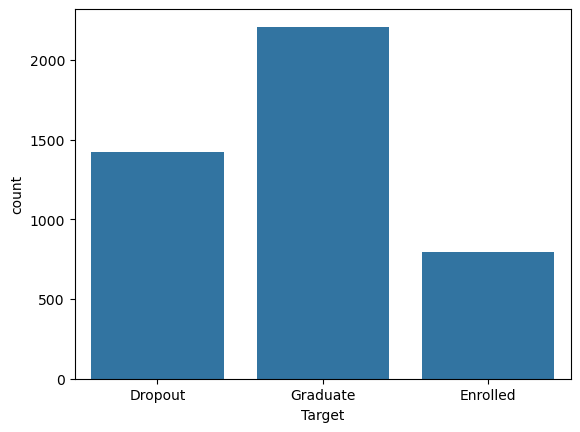

In [14]:
# Exploring the Target feature 
sns.countplot(x='Target', data=df)

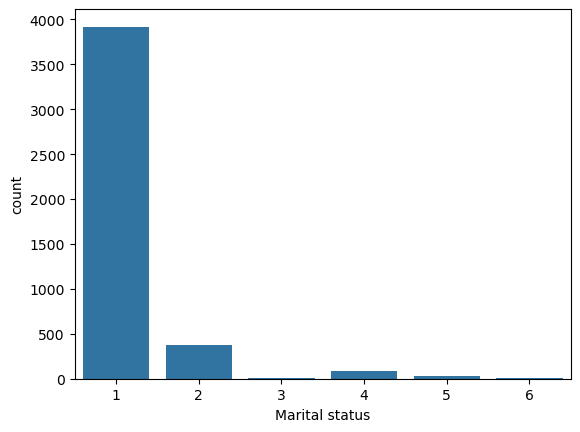

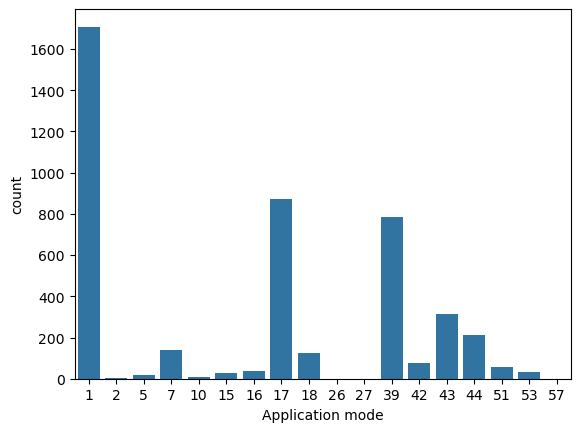

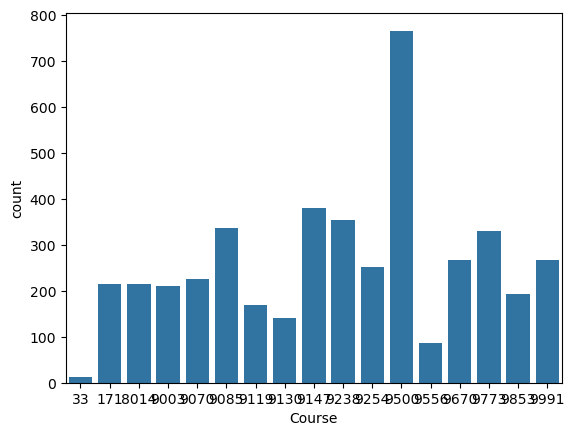

In [15]:
# Exploring the categorical features by visualizing Marital status, Applicattion mode, and Course features 
categorical_features = ['Marital status', 'Application mode', 'Course']
for col in categorical_features:
    sns.countplot(x=col, data=df)
    plt.show()

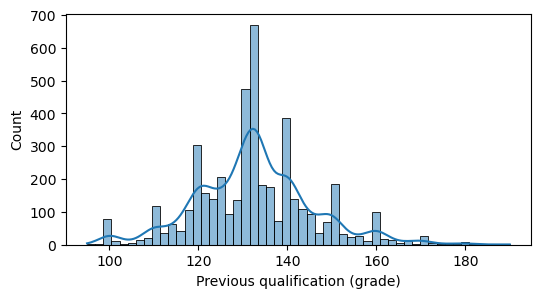

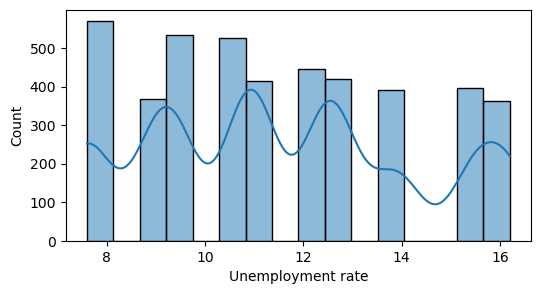

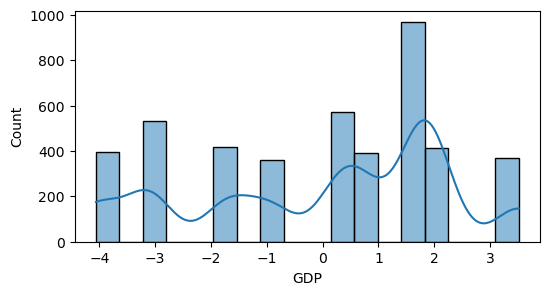

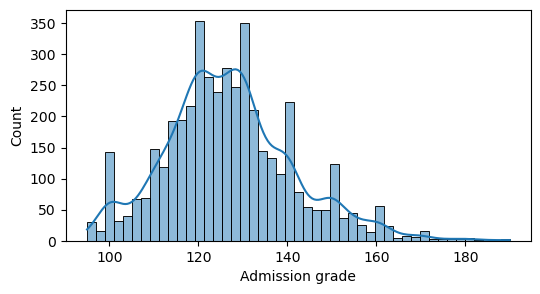

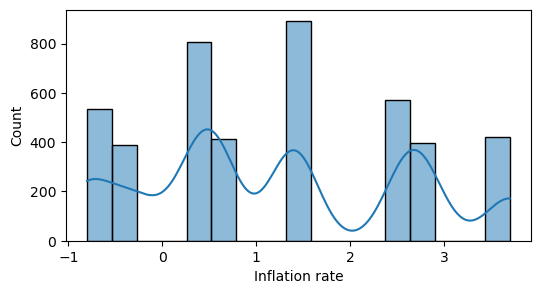

In [16]:
# Exploring the  Numerical features for understanding and  to check distributions 
numerical_features = ['Previous qualification (grade)', 'Unemployment rate', 'GDP','Admission grade','Inflation rate']
for col in numerical_features:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], kde=True)
    plt.show()

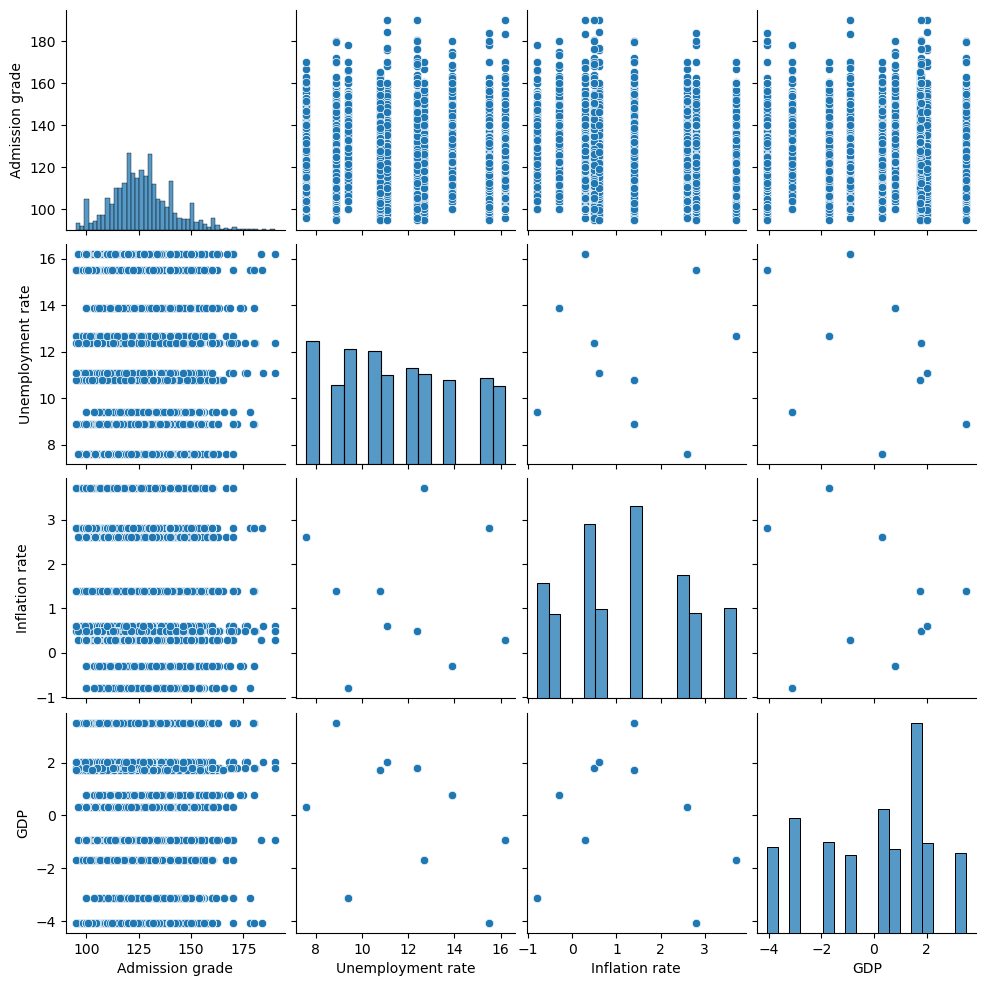

In [17]:
# Using pair plot to explore the numerical features 
sns.pairplot(df.iloc[:,[12,33,34,35]])

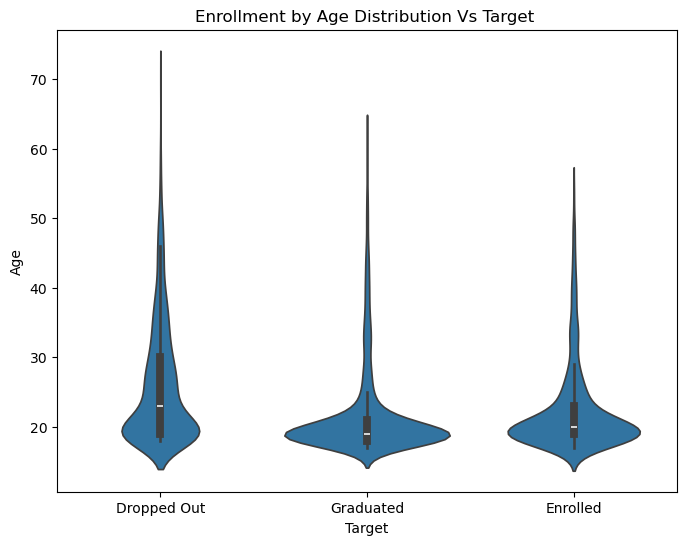

In [18]:
# Visualizing the age at enrolment against the Target feature
plt.figure(figsize=(8, 6))
sns.violinplot(x='Target', y='Age at enrollment', data=df)

# Customize plot
plt.title('Enrollment by Age Distribution Vs Target ')
plt.xlabel('Target')
plt.ylabel('Age')
plt.xticks([0, 1,2], ['Dropped Out', 'Graduated', 'Enrolled'])

plt.show()
            

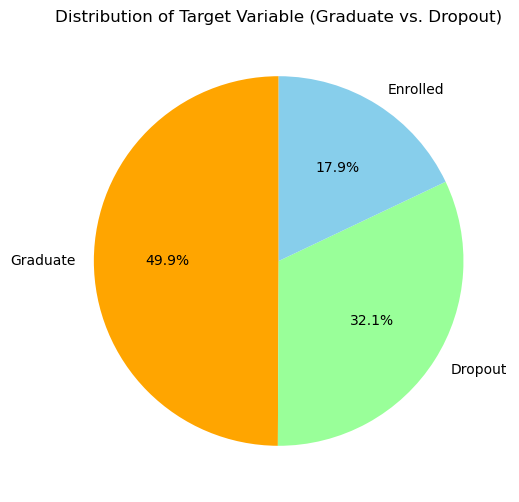

In [19]:
# Exploring the Target feature to visualise the proportion of each category ( Drop out,Graduate, and Enrolled) 
target_counts = df['Target'].value_counts()
# Plotting the  pie chart
plt.figure(figsize=(6, 6))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=90, colors=['#FFA500','#99ff99','#87CEEB'])
plt.title("Distribution of Target Variable (Graduate vs. Dropout)")
plt.show()

# Data Pre-prossessing 

## Checking  Target feature for  imballanced  class 

In [22]:
df['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [23]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [24]:
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [25]:
# checking if target data is ballanced 
df['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

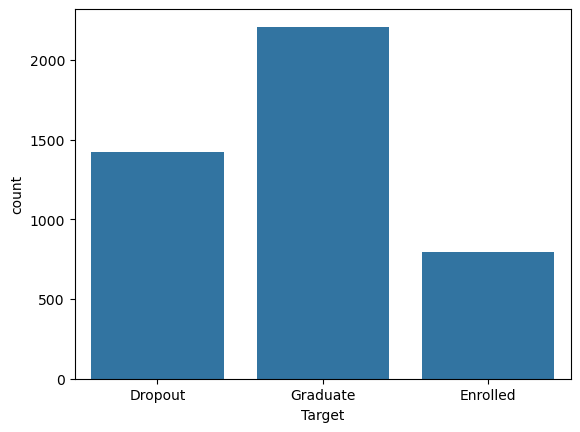

In [26]:
sns.countplot(df, x="Target")
plt.show()

In [27]:
# Removing the enrolment columns 
df_2=df[df["Target"] != 'Enrolled']

In [28]:
df_2.head(2)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate


In [29]:
# Conforming the required targeted features
df_2["Target"].unique()

array(['Dropout', 'Graduate'], dtype=object)

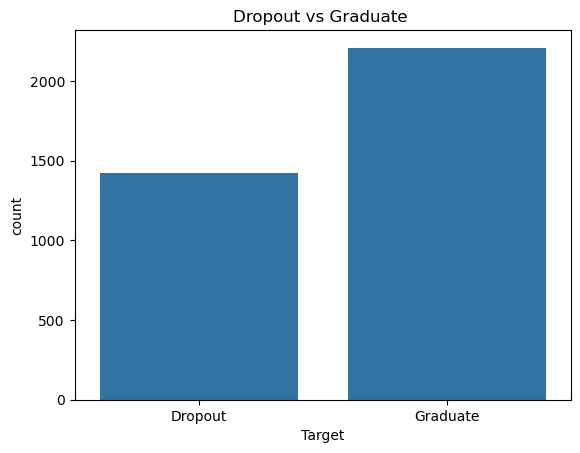

In [30]:
# Visualizing the features
sns.countplot(x='Target',data=df_2)
plt.title('Dropout vs Graduate ')
plt.show()

In [31]:
# Checking the percentage ratio of the imballanced class
print(df_2['Target'].value_counts(normalize=True) *100)

Target
Graduate    60.853994
Dropout     39.146006
Name: proportion, dtype: float64


In [32]:
'''
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
'''

'\nfrom imblearn.over_sampling import SMOTE\nsmote = SMOTE(random_state=42)\nX_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)\n'

In [33]:
# mapping the target feature to y - axis 
y = df_2['Target'].to_numpy()

In [34]:
y

array(['Dropout', 'Graduate', 'Dropout', ..., 'Dropout', 'Graduate',
       'Graduate'], dtype=object)

In [35]:
y = pd.DataFrame(y, columns=['y'])
y

,y
0,Dropout
1,Graduate
2,Dropout
3,Graduate
4,Graduate
...,...
3625,Graduate
3626,Dropout
3627,Dropout
3628,Graduate


In [36]:
# Encoding the Target feature, using Label Encoder
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

In [37]:
y_encoded

array([0, 1, 0, ..., 0, 1, 1])

In [38]:
y_encoded_df = pd.DataFrame(y_encoded, columns=['Target'])
y_encoded_df

,Target
0,0
1,1
2,0
3,1
4,1
...,...
3625,1
3626,0
3627,0
3628,1


In [39]:
y_encoded_df['Target'].unique()

array([0, 1])

In [40]:
df_2['Target'].unique()

array(['Dropout', 'Graduate'], dtype=object)

In [41]:
X = df_2.drop(columns=["Target"])

In [42]:
X

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,0,6,6,2,11.000000,0,11.1,0.6,2.02
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12


In [43]:
# Standardizing the X  features by scaling, using StandardScaler 
scaler = StandardScaler()
X_s = scaler.fit_transform(X)

In [44]:
X_s

array([[-0.30068558, -0.08191671,  2.4368225 , ..., -0.31131218,
         0.12161459,  0.77411864],
       [-0.30068558, -0.19714928, -0.56247077, ...,  0.85091858,
        -1.10607007,  0.35370412],
       [-0.30068558, -1.00377727,  2.4368225 , ..., -0.31131218,
         0.12161459,  0.77411864],
       ...,
       [-0.30068558, -1.00377727, -0.56247077, ...,  0.85091858,
        -1.10607007,  0.35370412],
       [-0.30068558, -1.00377727, -0.56247077, ..., -0.83619059,
        -1.46715379, -1.37663355],
       [-0.30068558, -0.4852307 , -0.56247077, ...,  0.4010228 ,
         1.78259971, -0.74822447]])

In [45]:
# Transforming the scaled features to DataFrame 
X_s_dataframe = pd.DataFrame(X_s, columns = X.columns)

In [46]:
X_s_dataframe

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,-0.300686,-0.081917,2.436822,-4.197769,0.355850,-0.352421,-0.825034,-0.124214,-0.063288,-0.692162,...,-0.189871,-0.287686,-2.782691,-1.958586,-1.429014,-1.831085,-0.190148,-0.311312,0.121615,0.774119
1,-0.300686,-0.197149,-0.562471,0.193388,0.355850,-0.352421,2.045805,-0.124214,-1.218383,-1.281423,...,-0.189871,-0.287686,-0.131002,-0.444817,0.468555,0.662383,-0.190148,0.850919,-1.106070,0.353704
2,-0.300686,-1.003777,2.436822,0.104434,0.355850,-0.352421,-0.825034,-0.124214,1.091807,0.944677,...,-0.189871,-0.287686,-0.131002,-1.958586,-1.429014,-1.831085,-0.190148,-0.311312,0.121615,0.774119
3,-0.300686,-0.081917,0.187353,0.444298,0.355850,-0.352421,-0.825034,-0.124214,1.155979,0.944677,...,-0.189871,-0.287686,-0.131002,0.564362,0.152293,0.431281,-0.190148,-0.836191,-1.467154,-1.376634
4,1.330837,1.185642,-0.562471,-0.406087,-2.810171,-0.352421,-2.487099,-0.124214,1.091807,1.010150,...,-0.189871,-0.287686,-0.131002,-0.444817,0.468555,0.540750,-0.190148,0.850919,-1.106070,0.353704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,-0.300686,-1.003777,3.186646,0.444298,0.355850,-0.352421,-0.598389,-0.124214,-1.218383,-1.412370,...,-0.189871,-0.287686,-0.131002,0.059772,0.152293,0.479934,-0.190148,1.450780,1.132649,-1.792623
3626,-0.300686,-1.003777,0.187353,0.444298,0.355850,-0.352421,-0.976131,15.475718,-1.218383,-1.412370,...,-0.189871,-0.287686,-0.131002,-0.444817,-0.796491,0.175852,-0.190148,-0.198838,-0.456119,0.898030
3627,-0.300686,-1.003777,-0.562471,0.312317,0.355850,-0.352421,1.592514,-0.124214,1.091807,0.944677,...,-0.189871,-0.287686,0.752895,0.312067,-1.112752,0.631975,-0.190148,0.850919,-1.106070,0.353704
3628,-0.300686,-1.003777,-0.562471,0.141659,0.355850,-0.352421,3.556773,-0.124214,1.091807,0.944677,...,-0.189871,-0.287686,-0.572950,-0.444817,0.152293,0.358301,-0.190148,-0.836191,-1.467154,-1.376634


In [47]:
# Spliting the dataset to ratio 80 : 20 in preparation for training 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_s_dataframe,y_encoded,test_size=0.2, random_state=0, stratify=y)

<Axes: ylabel='count'>

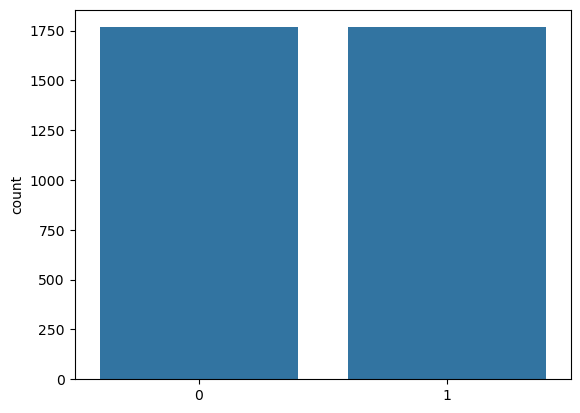

In [48]:
# Implementing resampling using SMOTE to ballance the class 
from imblearn.over_sampling import SMOTE

resampler = SMOTE(random_state=0)
X_train_smote, y_train_smote = resampler.fit_resample(X_train, y_train)

sns.countplot(x=y_train_smote)

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_selection import RFECV

In [50]:
# Using feature selection to check for any irrelivant feautures for removal 
from sklearn.feature_selection import VarianceThreshold

variance_selector = VarianceThreshold(threshold=0)
X_train_fs = variance_selector.fit_transform(X_train_smote)
X_test_fs = variance_selector.transform(X_test)
print(f"{X_train_smote.shape[1]-X_train_fs.shape[1]} features have been removed, {X_train_fs.shape[1]} features remain")

0 features have been removed, 36 features remain


# Implementing Random Forest to train the data

In [52]:
# Instantiated RandormForestClassifier model to train the data 

clf = RandomForestClassifier()
clf.fit(X_train_smote, y_train_smote)

RandomForestClassifier()

# Predicting Results

In [54]:
# prediciting the predicted  results

y_pred=clf.predict(X_test)
print(y_pred)

[1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1
 1 0 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0
 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 0 0 1 0
 1 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0
 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1
 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1
 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 0
 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0
 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 0
 1 1 0 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 0 1 1 1 0 1
 1 0 1 1 0 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 1 1 0 1 0 1 1 1 1 1 0 1 

In [55]:
# Viewing the test dataset for prediction 
_x = X_test.head(2)
_x

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
3275,-0.300686,1.416107,-0.562471,0.185653,0.35585,-0.352421,-0.220647,-0.124214,1.155979,-0.233847,...,-0.189871,6.140292,2.962636,1.321246,2.049862,0.374888,-0.190148,1.713219,-0.672770,-0.403042
791,-0.300686,-1.003777,0.937176,0.394503,0.35585,-0.352421,0.081546,-0.124214,-0.384148,-0.757635,...,-0.189871,-0.287686,-1.014898,-0.949407,-1.429014,-1.831085,-0.190148,-1.511034,0.988216,0.145710


In [56]:
len(y_pred)  # checking the length of predicted result

726

In [57]:
len(X_test)  # checking the length of the test result

726

# Evaluating Model Performance

In [59]:
from sklearn import metrics
acc=metrics.accuracy_score(y_test,y_pred)
print('Accuracy Score: %.2f\n\n'%(acc))
cm=metrics.confusion_matrix(y_test,y_pred)
print(cm,'\n\n')
print('-------------------------------------')
result=metrics.classification_report(y_test,y_pred)
print('Classification Report: \n')
print(result)

Accuracy Score: 0.92


[[242  42]
 [ 16 426]] 


-------------------------------------
Classification Report: 

              precision    recall  f1-score   support

           0       0.94      0.85      0.89       284
           1       0.91      0.96      0.94       442

    accuracy                           0.92       726
   macro avg       0.92      0.91      0.91       726
weighted avg       0.92      0.92      0.92       726



Accuracy Score: 92.01%


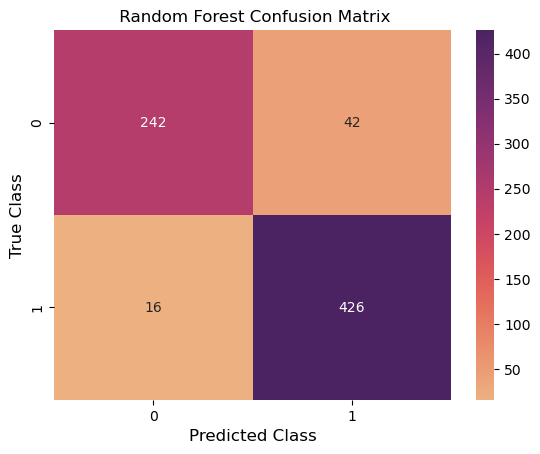

In [60]:
# Printing the percentage of the acuracy score and visualising the confusion matrix 
print(f"Accuracy Score: {accuracy_score(y_test,y_pred)*100:.2f}%")

cm = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(cm, cmap='flare',annot=True, fmt='d')
plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title(" Random Forest Confusion Matrix",fontsize=12)
plt.show()


In [61]:
'''
# using seaborn heatmap to visualise the confusion matrix
ax = sns.heatmap(cm, cmap='flare',annot=True, fmt='d')

plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Confusion Matrix",fontsize=12)

plt.show()
'''

'\n# using seaborn heatmap to visualise the confusion matrix\nax = sns.heatmap(cm, cmap=\'flare\',annot=True, fmt=\'d\')\n\nplt.xlabel("Predicted Class",fontsize=12)\nplt.ylabel("True Class",fontsize=12)\nplt.title("Confusion Matrix",fontsize=12)\n\nplt.show()\n'

# Hyperparameter Tunning : Random Forest 

In [63]:
pip install dill

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import dill
import joblib

param_grid = {
    'n_estimators': [0, 50, 100],
    'max_depth': [None, 10, 5],
    'min_samples_split':[10,5,2],
    'bootstrap': [False,True],
    'min_samples_leaf':[0,1,3]
}
gI = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=param_grid, cv=StratifiedKFold(5),
                   scoring='accuracy',n_jobs=-1, verbose=2)

In [65]:
gI.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [False, True], 'max_depth': [None, 10, 5],
                         'min_samples_leaf': [0, 1, 3],
                         'min_samples_split': [10, 5, 2],
                         'n_estimators': [0, 50, 100]},
             scoring='accuracy', verbose=2)

In [66]:
print(gI.best_estimator_)   # to get the complete detail of the best model

RandomForestClassifier(bootstrap=False, n_estimators=50, random_state=0)


In [67]:
print(gI.best_params_)   # To get the best hyperparameter values were searched for

{'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [68]:
print(gI.best_score_)

0.9236097142696866


In [69]:
# Viewing the best parameter and model
print("The final report of random forest classifier based  on estimator is: " )
print("Best Estimator:", gI.best_estimator_)
print("Best Parameters:", gI.best_params_)
print("Best Accuracy Score:", gI.best_score_)

The final report of random forest classifier based  on estimator is: 
Best Estimator: RandomForestClassifier(bootstrap=False, n_estimators=50, random_state=0)
Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Accuracy Score: 0.9236097142696866


In [70]:
gI.best_score_

0.9236097142696866

# Evaluating the best model on the test data 

In [72]:
best_model = gI.best_estimator_
y_pred = best_model.predict(X_test)

# Test Accuracy Evaluation 
print("Test Accuracy:", accuracy_score(y_test, y_pred))
#print("Classification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.9104683195592287


In [73]:
y_pred

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,

# Implementing gradient boosting

In [75]:
# implementing gradient boosting 
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train_smote, y_train_smote)

'''
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_clf.fit(X_train_smote, y_train_smote)
'''

'\ngb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)\ngb_clf.fit(X_train_smote, y_train_smote)\n'

In [76]:
#  Evaluate the Gradient boosting Model
y_pred_g = gb_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_g))
print("Classification Report:\n", classification_report(y_test, y_pred_g))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_g))

Accuracy: 0.9173553719008265
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.87      0.89       284
           1       0.92      0.95      0.93       442

    accuracy                           0.92       726
   macro avg       0.92      0.91      0.91       726
weighted avg       0.92      0.92      0.92       726

Confusion Matrix:
 [[246  38]
 [ 22 420]]


Accuracy Score: 91.05%


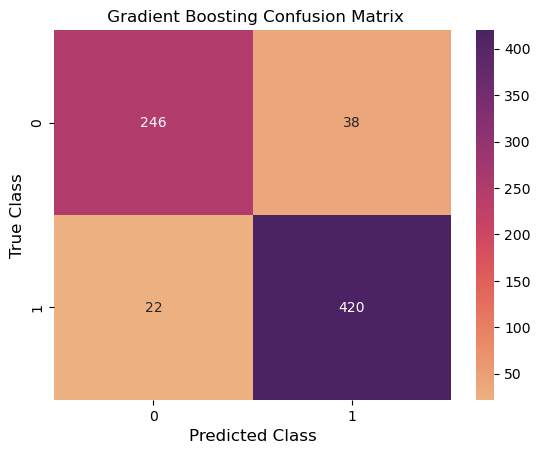

In [77]:
# Printing the percentage of the acuracy score and visualising the confusion matrix 
print(f"Accuracy Score: {accuracy_score(y_test,y_pred)*100:.2f}%")

cm = confusion_matrix(y_test,y_pred_g)
ax = sns.heatmap(cm, cmap='flare',annot=True, fmt='d')
plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title(" Gradient Boosting Confusion Matrix",fontsize=12)
plt.show()

## Hyperparameter Tunning : Gradient Boosting 

In [79]:
from sklearn.pipeline import Pipeline
model = GradientBoostingClassifier(random_state=42)
#model = gb_clf
# Setting up the parameter
param_grid = {
    'n_estimators': [300, 100, 50,150,200],
    'max_depth': [None, 3, 5,2,3],
    'min_samples_split':[10,5,3,4,None],
    'subsample': [0.5,1.0,1.5,None,0.2,],
    #'min_samples_leaf':[0,1,3],
    'learning_rate': [0.02,0.1,0.1,None,0.01]
    
}
gbg_s = GridSearchCV(estimator=model, param_grid=param_grid, cv=2,  n_jobs=-1, verbose=2)
#gbg_s = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid=param_grid, cv=4, scoring='accuracy', n_jobs=1, verbose=2)


In [80]:
gbg_s.fit(X_train_smote, y_train_smote)

Fitting 2 folds for each of 3125 candidates, totalling 6250 fits


GridSearchCV(cv=2, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.02, 0.1, 0.1, None, 0.01],
                         'max_depth': [None, 3, 5, 2, 3],
                         'min_samples_split': [10, 5, 3, 4, None],
                         'n_estimators': [300, 100, 50, 150, 200],
                         'subsample': [0.5, 1.0, 1.5, None, 0.2]},
             verbose=2)

In [81]:
# Viewing the best parameter and model
print("The final report of gradient boosting classifier based  on estimator is: " )
print(" GB Best Estimator:", gbg_s.best_estimator_)
print(" GB Best Parameters:", gbg_s.best_params_)
print("GB Best Accuracy Score:", gbg_s.best_score_)

The final report of gradient boosting classifier based  on estimator is: 
 GB Best Estimator: GradientBoostingClassifier(max_depth=5, min_samples_split=4, n_estimators=300,
                           random_state=42)
 GB Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 300, 'subsample': 1.0}
GB Best Accuracy Score: 0.9026598754951896


In [82]:
# Declaring the best gradient boost tunned model 
GB_best_model = gbg_s.best_estimator_
GB_best_model

GradientBoostingClassifier(max_depth=5, min_samples_split=4, n_estimators=300,
                           random_state=42)

In [83]:
# Predicting the tunned gradient boosting model with the test data

In [84]:
# Predicting the tunned gradient boosting model with the test data
y_pred_gb_tunned = GB_best_model.predict(X_test)


In [85]:
# Understanding the tunned gradient boosting model 
print("Accuracy:", accuracy_score(y_test, y_pred_gb_tunned))
print("Classification Report:\n", classification_report(y_test, y_pred_gb_tunned))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb_tunned))

Accuracy: 0.9118457300275482
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.88       284
           1       0.91      0.94      0.93       442

    accuracy                           0.91       726
   macro avg       0.91      0.90      0.91       726
weighted avg       0.91      0.91      0.91       726

Confusion Matrix:
 [[245  39]
 [ 25 417]]


In [86]:
# Gradient boosting untunned model 
y_pred_g = gb_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_g))
print("Classification Report:\n", classification_report(y_test, y_pred_g))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_g))

Accuracy: 0.9173553719008265
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.87      0.89       284
           1       0.92      0.95      0.93       442

    accuracy                           0.92       726
   macro avg       0.92      0.91      0.91       726
weighted avg       0.92      0.92      0.92       726

Confusion Matrix:
 [[246  38]
 [ 22 420]]


In [87]:
y_pred = best_model.predict(X_test)   # best random forest prediction model


In [88]:
y_pred_g = gb_clf.predict(X_test)    # best gradient boosting prediction model

# Comparing both algorithms  based on metrics 

In [90]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [91]:
# checking for accuracy 
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_g))

Random Forest Accuracy: 0.9104683195592287
Gradient Boosting Accuracy: 0.9173553719008265


In [92]:
# checking for precision score 
print("Random Forest Precision:", precision_score(y_test, y_pred))
print("Gradient Boosting Precision:", precision_score(y_test, y_pred_g))

Random Forest Precision: 0.9088937093275488
Gradient Boosting Precision: 0.9170305676855895


In [93]:
# checking for recall 
print("Random Forest Recall:", recall_score(y_test, y_pred))
print("Gradient Boosting Recall:", recall_score(y_test, y_pred_g))

Random Forest Recall: 0.9479638009049773
Gradient Boosting Recall: 0.9502262443438914


In [94]:
# Checking for F! score 
# checking for precision score 
print("Random Forest F1 Score:", f1_score(y_test, y_pred))
print("Gradient Boosting F1 Score:", f1_score(y_test, y_pred_g))

Random Forest F1 Score: 0.9280177187153932
Gradient Boosting F1 Score: 0.9333333333333333


In [95]:
# checking for confusion matrix
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Gradient Boosting Confusion Matrix:\n", confusion_matrix(y_test, y_pred_g))

Random Forest Confusion Matrix:
 [[242  42]
 [ 23 419]]
Gradient Boosting Confusion Matrix:
 [[246  38]
 [ 22 420]]


### The best algorithm based on comparison is the gradient boosting. 

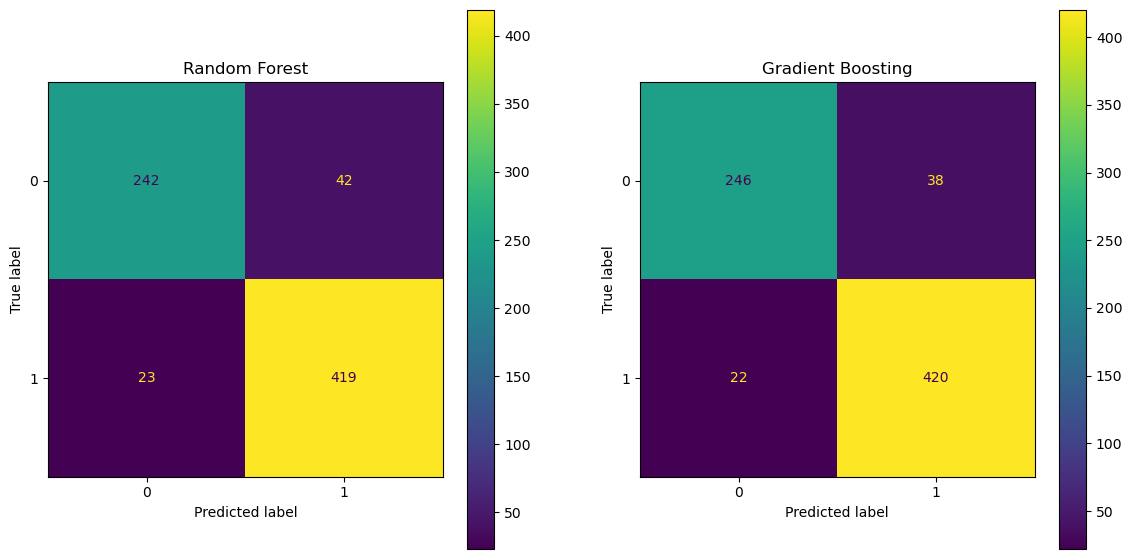

In [97]:
from sklearn.metrics import ConfusionMatrixDisplay

# Ploting  Random Forest confusion matrix
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, ax=axes[0])
axes[0].set_title("Random Forest")

# Plotting Gradient Boosting confusion matrix 
ConfusionMatrixDisplay.from_estimator(gb_clf, X_test, y_test, ax=axes[1])
axes[1].set_title("Gradient Boosting")

plt.show()

# Making prediction with the best performing model : Gradient Boosting

In [99]:
# Making predictiction with the best model 
y_pred_g = gb_clf.predict(X_test)    # best gradient boosting prediction model

In [100]:
y_pred_g

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,

## Saving the best model for future predictions 

In [102]:

# Saving the best model: Gradient Boosting 
joblib.dump(gb_clf, "best_model_GB.pkl")

# NOTE:  To Load the best label for prediction:
# Use :  loaded_model = joblib.load("best_model.pkl")
# Making predisctions = loaded_model.predict(new_data)

['best_model_GB.pkl']

In [103]:
# The codes to Implement the best model without retraining the entire model
#  Here : y_pred_g = best_model_GB.predict(X_test)

In [104]:
# Tranforming the encoded variable to readable format
y_pred_g_label = np.where(y_pred == 0, "Dropout", "Graduate")

# Printing the labeled predictions for readability 
print("Labeled Predictions:", y_pred_g_label)

Labeled Predictions: ['Graduate' 'Dropout' 'Dropout' 'Dropout' 'Graduate' 'Graduate' 'Graduate'
 'Graduate' 'Dropout' 'Graduate' 'Dropout' 'Graduate' 'Graduate'
 'Graduate' 'Graduate' 'Graduate' 'Dropout' 'Dropout' 'Dropout' 'Graduate'
 'Dropout' 'Dropout' 'Graduate' 'Graduate' 'Graduate' 'Graduate' 'Dropout'
 'Graduate' 'Graduate' 'Dropout' 'Graduate' 'Graduate' 'Graduate'
 'Graduate' 'Graduate' 'Graduate' 'Graduate' 'Dropout' 'Dropout'
 'Graduate' 'Graduate' 'Graduate' 'Graduate' 'Dropout' 'Graduate'
 'Dropout' 'Graduate' 'Dropout' 'Graduate' 'Graduate' 'Graduate'
 'Graduate' 'Graduate' 'Dropout' 'Graduate' 'Graduate' 'Graduate'
 'Dropout' 'Graduate' 'Graduate' 'Dropout' 'Dropout' 'Graduate' 'Dropout'
 'Graduate' 'Graduate' 'Graduate' 'Graduate' 'Graduate' 'Graduate'
 'Graduate' 'Graduate' 'Graduate' 'Graduate' 'Graduate' 'Dropout'
 'Dropout' 'Graduate' 'Graduate' 'Dropout' 'Graduate' 'Dropout' 'Graduate'
 'Graduate' 'Dropout' 'Dropout' 'Graduate' 'Dropout' 'Graduate' 'Dropout'
 'Dro